# 回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读入训练数据
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)

In [4]:
train_x = train[:,0]

In [5]:
train_y = train[:,1]

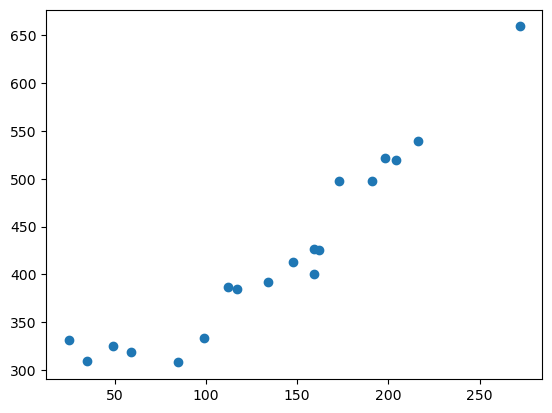

In [6]:
# 绘图
plt.plot(train_x, train_y, 'o')
plt.show()

## 作为一次函数实现

In [8]:
# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
# 预测函数
def f(x):
    return theta0 + theta1 * x

In [10]:
# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [11]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()

In [12]:
def standardize(x):
    return (x - mu) / sigma

In [13]:
train_z = standardize(train_x)

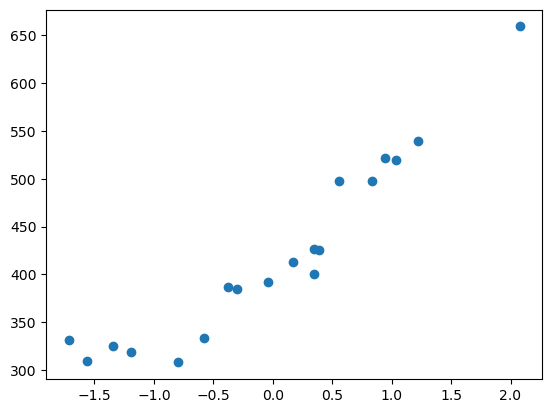

In [14]:
plt.plot(train_z, train_y, 'o')
plt.show()

In [15]:
# 学习率
ETA = 1e-3

In [16]:
# 误差的差值
diff = 1

In [17]:
# 更新次数
count = 0

In [18]:
# 重复学习
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    # 更新参数
    theta0 = tmp0
    theta1 = tmp1
    # 计算与上一次误差的差值
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    # 输出日志
    count += 1
    log = '第{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))
    

第1次: theta0 = 8.397, theta1 = 2.145, 差值 = 65903.0426
第2次: theta0 = 16.230, theta1 = 3.783, 差值 = 63422.5180
第3次: theta0 = 23.913, theta1 = 5.390, 差值 = 61035.3578
第4次: theta0 = 31.451, theta1 = 6.967, 差值 = 58738.0480
第5次: theta0 = 38.846, theta1 = 8.514, 差值 = 56527.2066
第6次: theta0 = 46.100, theta1 = 10.031, 差值 = 54399.5791
第7次: theta0 = 53.216, theta1 = 11.519, 差值 = 52352.0333
第8次: theta0 = 60.197, theta1 = 12.979, 差值 = 50381.5551
第9次: theta0 = 67.045, theta1 = 14.411, 差值 = 48485.2438
第10次: theta0 = 73.763, theta1 = 15.816, 差值 = 46660.3077
第11次: theta0 = 80.353, theta1 = 17.195, 差值 = 44904.0604
第12次: theta0 = 86.819, theta1 = 18.547, 差值 = 43213.9164
第13次: theta0 = 93.161, theta1 = 19.874, 差值 = 41587.3878
第14次: theta0 = 99.383, theta1 = 21.175, 差值 = 40022.0801
第15次: theta0 = 105.487, theta1 = 22.452, 差值 = 38515.6891
第16次: theta0 = 111.475, theta1 = 23.704, 差值 = 37065.9970
第17次: theta0 = 117.349, theta1 = 24.932, 差值 = 35670.8700
第18次: theta0 = 123.111, theta1 = 26.138, 差值 = 34328.2541
第19

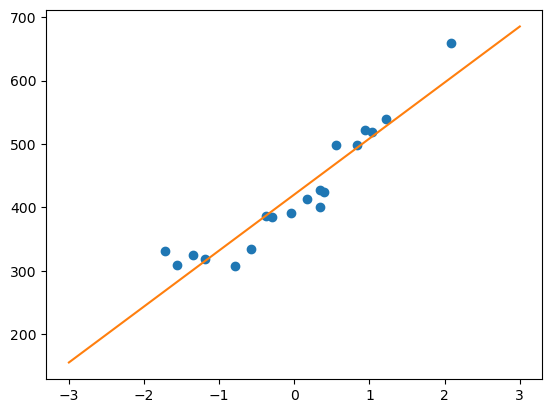

In [19]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()